# <center> Data EDA & Computing RV

## References
* ### [Main Paper](https://drive.google.com/file/d/1ySlrraRumlBz5rlUTOOwJbF6WrfyCEIq/view?usp=sharing)
* ### [MedRV](https://vk.com/away.php?to=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1LdgH5jo3Rzq7a9HGcdiDc7MZsMVo0oVi%2Fview&cc_key=)

## 1. Data uploading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
sns.set(style="whitegrid")
sns.set_context("talk", font_scale = 1)
sns.set_palette('tab10')

In [2]:
companies = ['lukoil','mts','novatek','rosneft','sberbank','x5','yandex','gazprom']

In [3]:
lukoil = pd.read_csv('data/closed/lukoil.csv', sep = ';')
mts = pd.read_csv('data/closed/mts.csv', sep = ';')
novatek = pd.read_csv('data/closed/novatek.csv', sep = ';')
rosneft = pd.read_csv('data/closed/rosneft.csv', sep = ';')
sberbank = pd.read_csv('data/closed/sberbankk.csv', sep = ';',encoding = "cp1251")
x5 = pd.read_csv('data/closed/x5.csv', sep = ';')
yandex = pd.read_csv('data/closed/yandex.csv', sep = ';')
gazprom = pd.read_csv('data/closed/gazprom.csv', sep = ';')

In [4]:
companies_dfs = [lukoil, mts, novatek, rosneft, sberbank, x5, yandex, gazprom]

In [5]:
# date to datetime
for company in companies_dfs:
    company['date'] = pd.to_datetime(company['date'],dayfirst = True)

## 2. EDA Prices

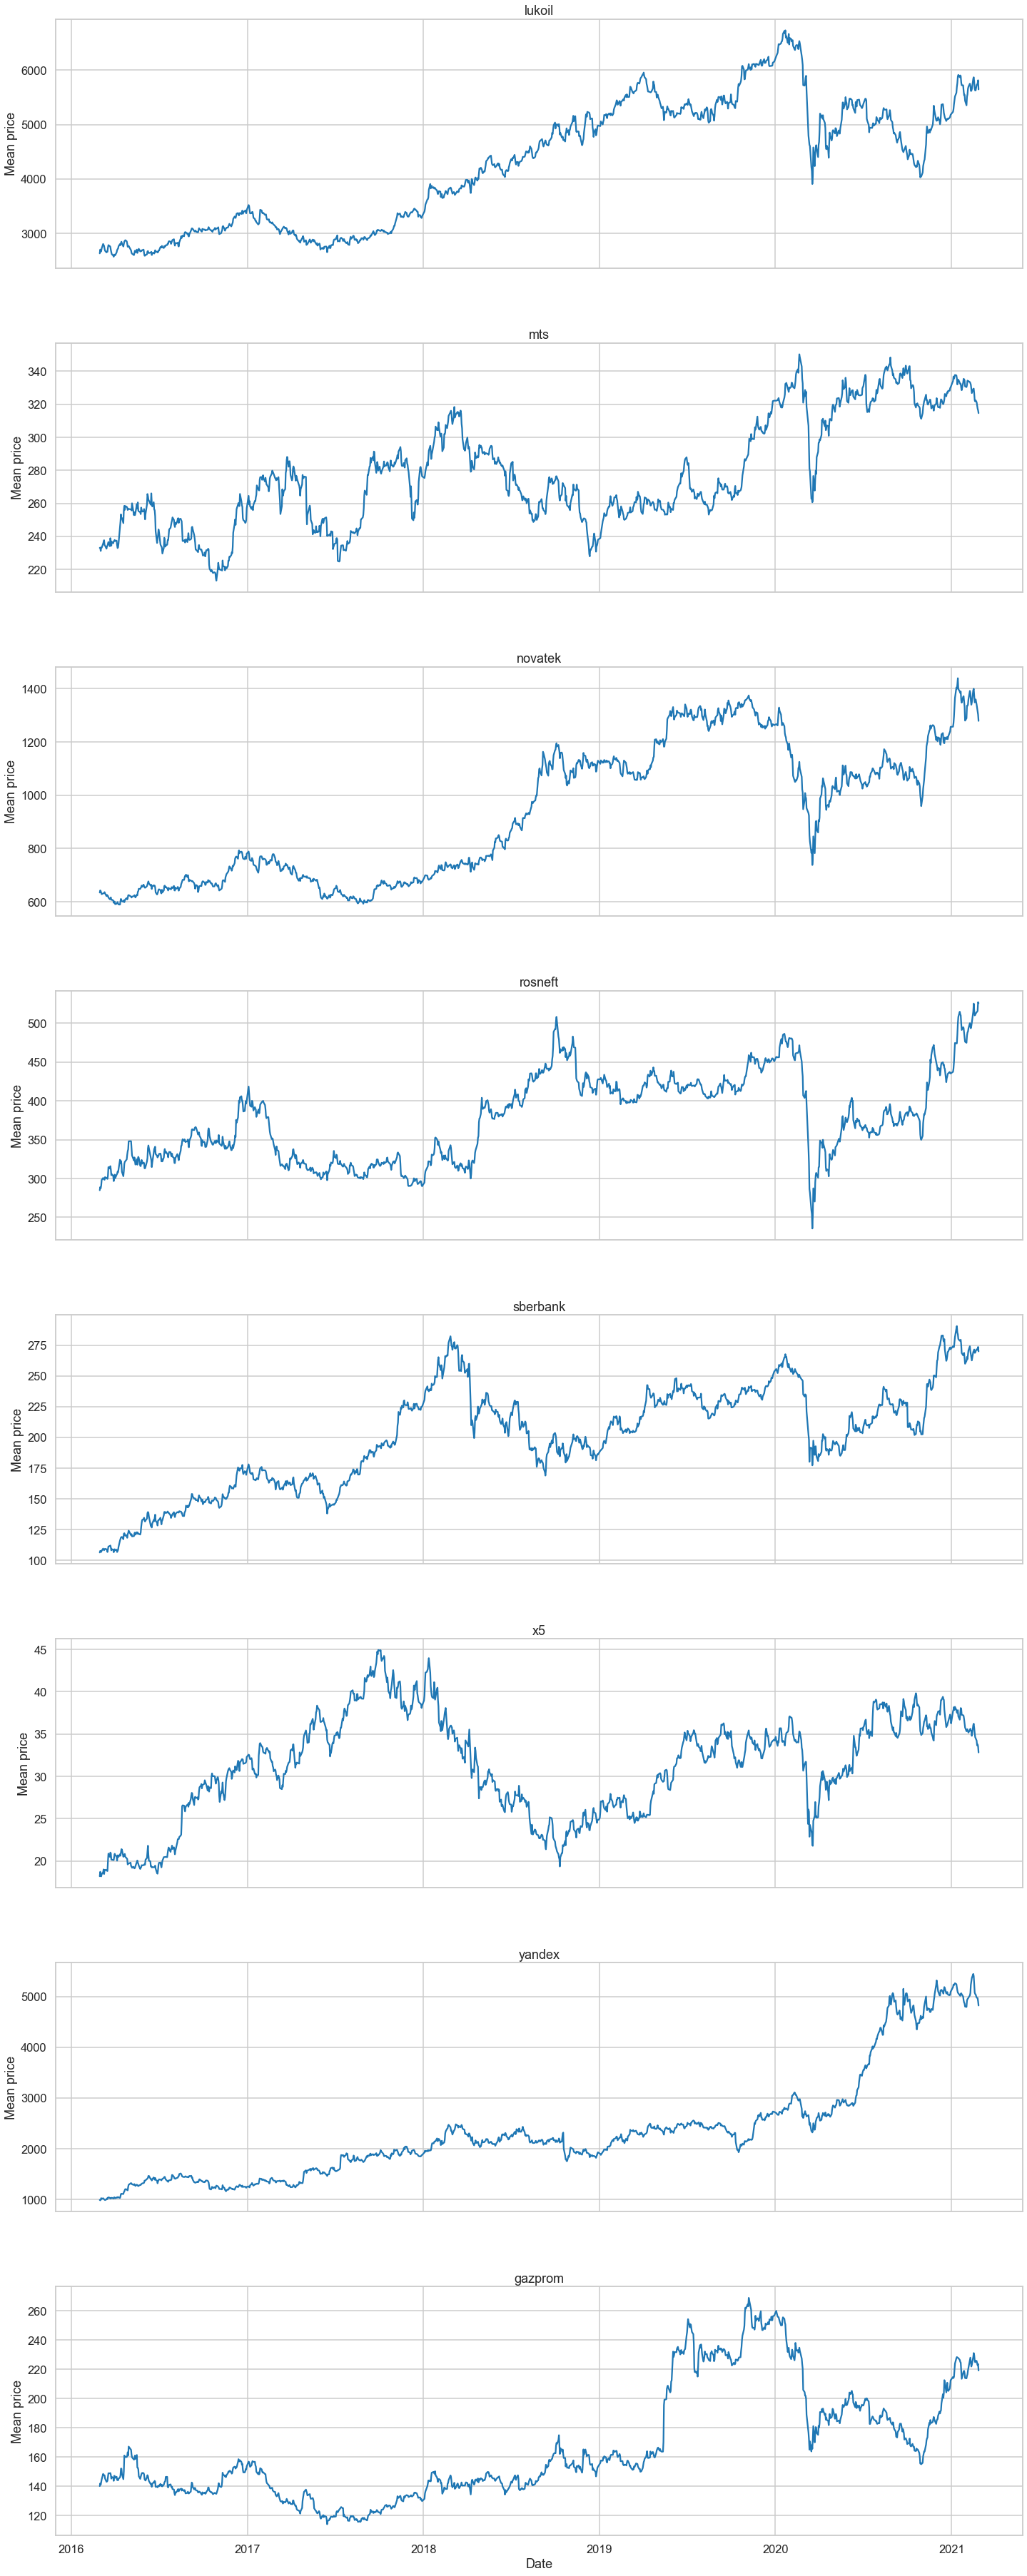

In [6]:
fig, axes = plt.subplots(8,1, figsize=(20, 50), sharex = True)
fig.tight_layout(h_pad=5)

for i in range(len(companies_dfs)):
    data = companies_dfs[i]\
                    .groupby('date', as_index = False)\
                    .agg({'price':'mean'})
    

    sns.lineplot(x = data['date'].values, y = data['price'].values, ax = axes[i])
    axes[i].set_title(f'{companies[i]}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Mean price') 

    

## 3. MedRV evaluating

In [7]:
# Function for MedRV
def MedRV(prices):
    # Logarithm. Length = N
    prices_lg = np.log(prices)
    
    # First differences. Length = N-1
    prices_lg_df = np.diff(prices_lg, n = 1)
    prices_lg_df_abs = np.abs(prices_lg_df)
    N = len(prices_lg_df)
    
    # MedRV
    first_coef = math.pi / (6 - 4 * (3**(0.5)) + math.pi)
    second_coef = N / (N-2)
    S = 0
    for i in range(1,N-1):
        slicing_3 = [prices_lg_df_abs[i-1], prices_lg_df_abs[i], prices_lg_df_abs[i+1]]
        S += np.median(slicing_3)**2
        
    MedRV = first_coef * second_coef * S
    
    return MedRV

In [8]:
# MedRV evaluating
companies_RV_dfs = {}
companies_RV = []

for company, name in zip(companies_dfs,companies):
    RV = company\
                .groupby('date')\
                .price\
                .apply(MedRV)\
                .values
    
    dates = company.date.unique()
    
    df_RV = pd.DataFrame(columns = ['date','MedRV'])
    df_RV['MedRV'] = RV
    df_RV['date'] = dates
    
    df_name = name + '_RV'
    
    companies_RV_dfs[df_name] = df_RV
    companies_RV.append(df_name)


## 4. EDA MedRV

### 4.1 Lineplot: MedRV (date)

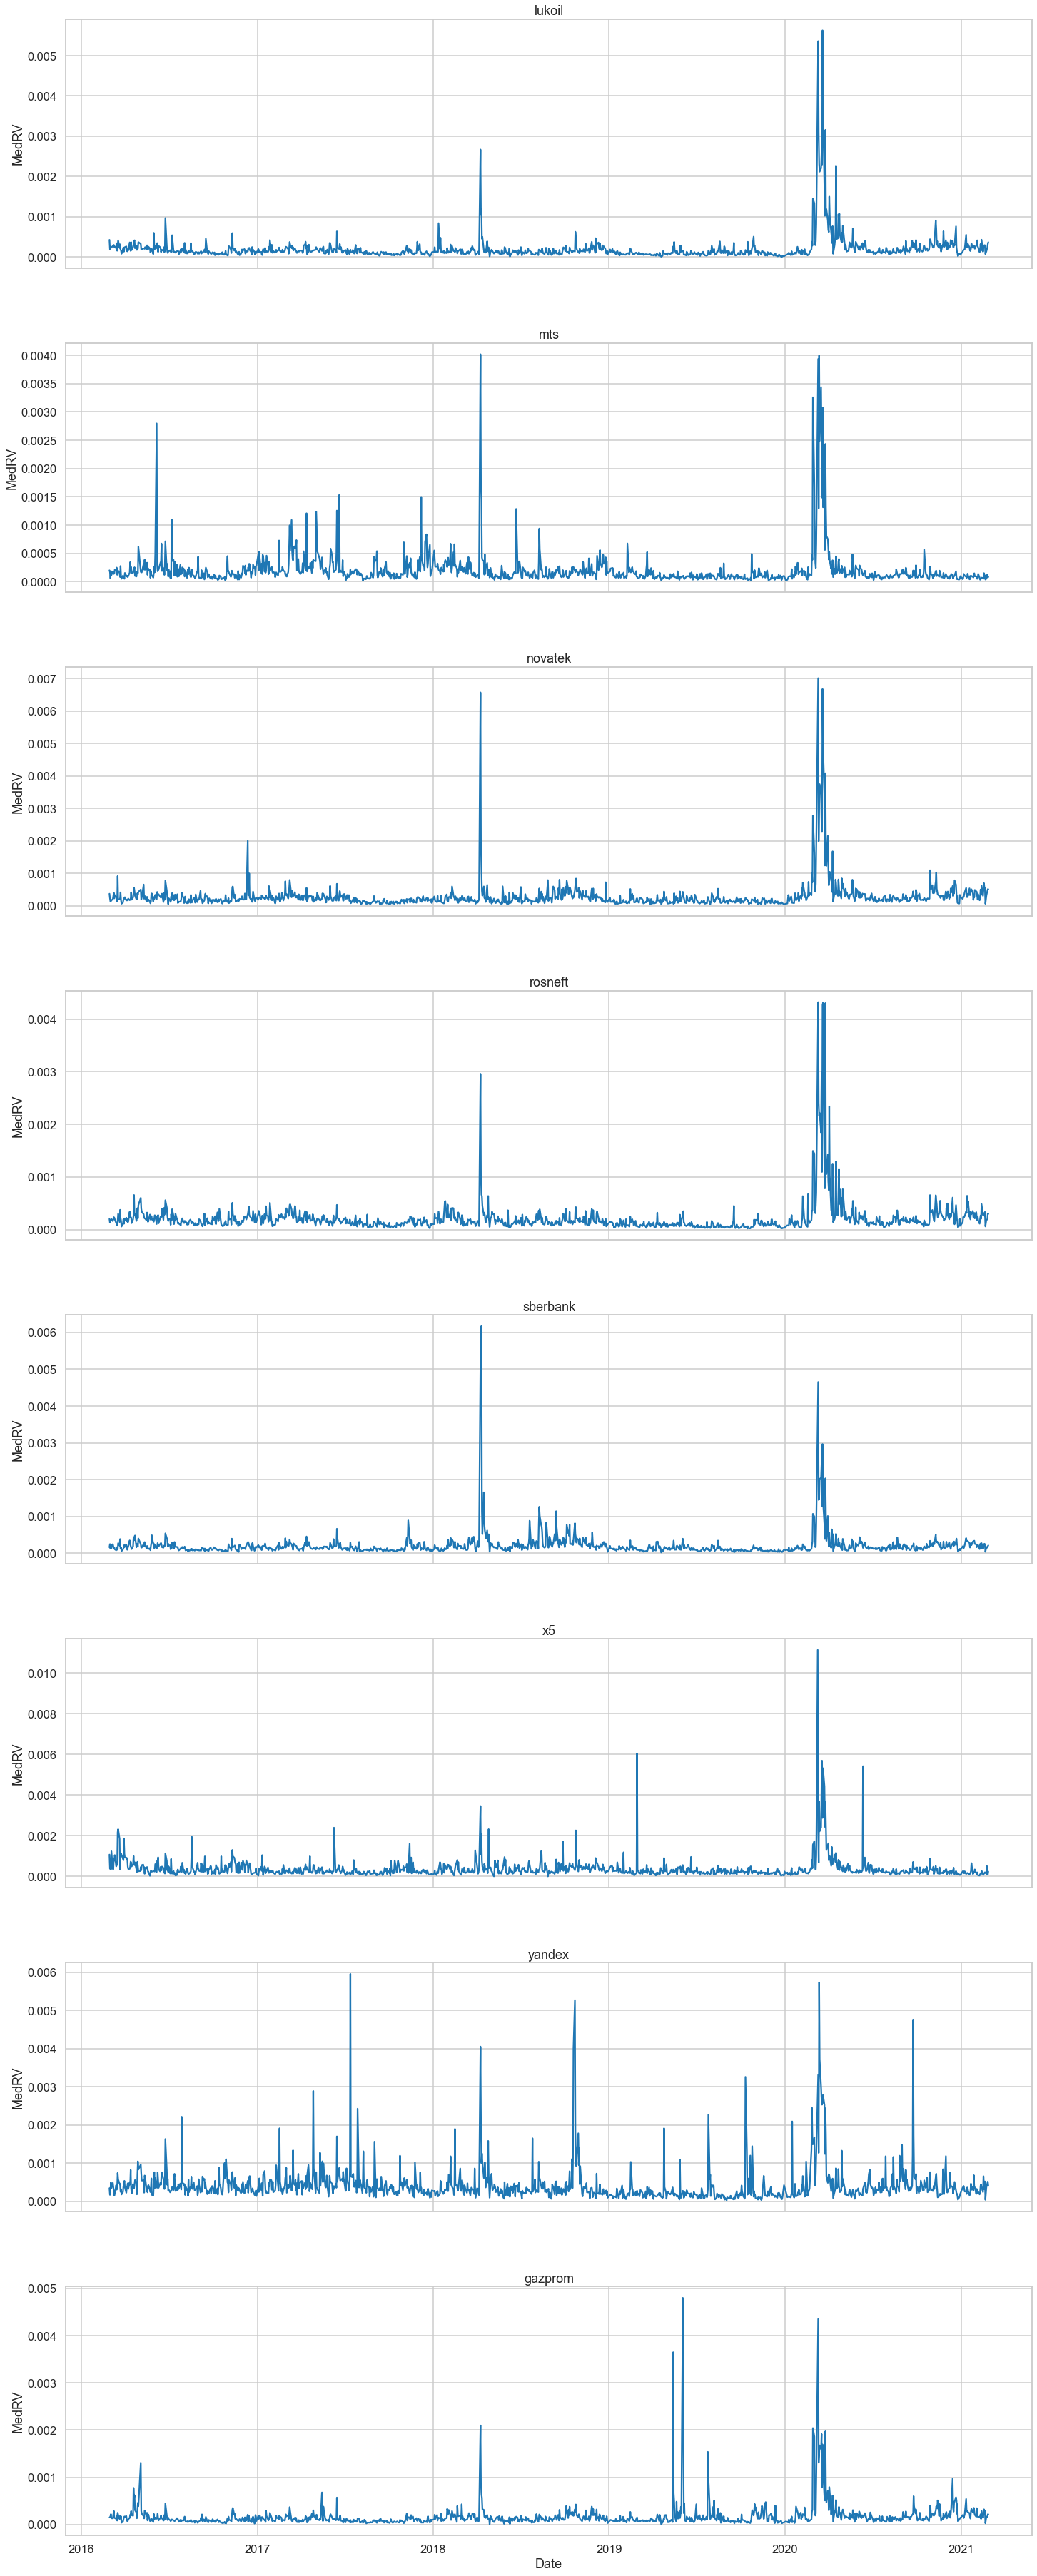

In [9]:
fig, axes = plt.subplots(8,1, figsize=(20, 50), sharex = True)
fig.tight_layout(h_pad=5)


for i, name in enumerate(companies_RV):
    sns.lineplot(x = companies_RV_dfs[name]['date'].values, y = companies_RV_dfs[name]['MedRV'].values, ax = axes[i])
    axes[i].set_title(f'{companies[i]}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('MedRV') 

### 4.2 Distribution MedRV 

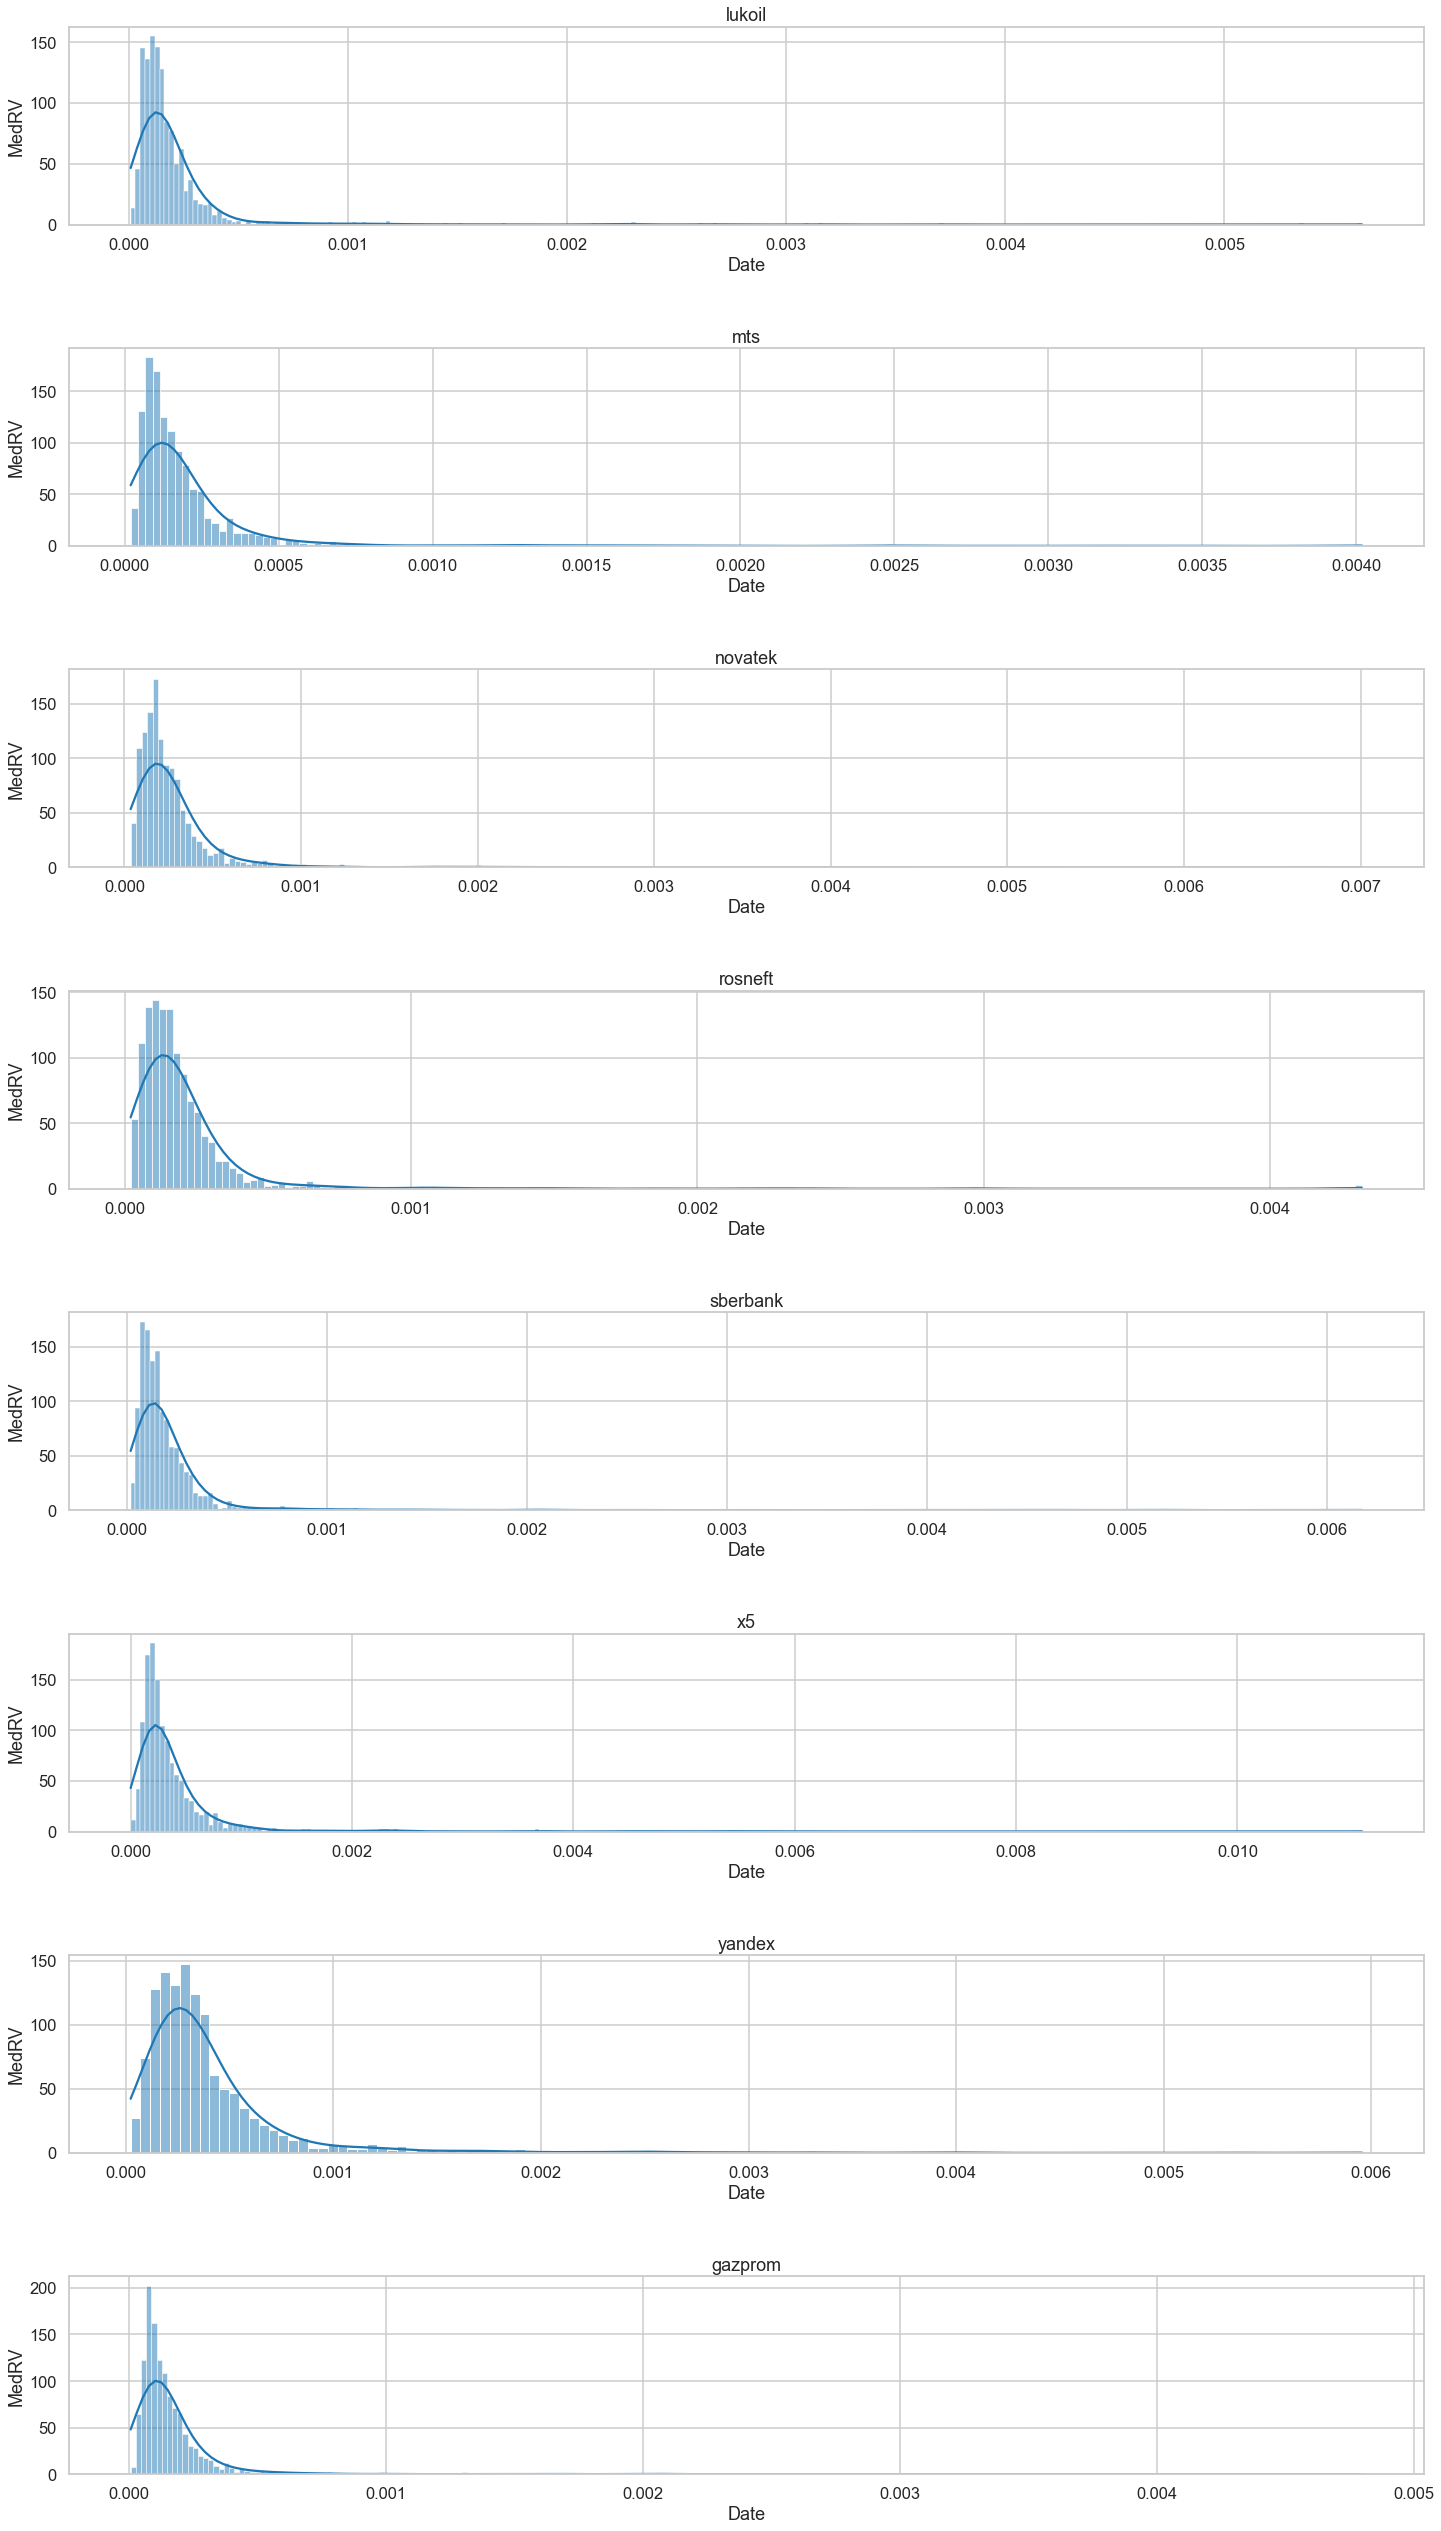

In [10]:
fig, axes = plt.subplots(8,1, figsize=(20, 35))
fig.tight_layout(h_pad=5)


for i, name in enumerate(companies_RV):
    sns.histplot(companies_RV_dfs[name]['MedRV'].values, kde = True,  ax = axes[i])
    axes[i].set_title(f'{companies[i]}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('MedRV') 

### 4.3 Lineplot: log MedRV (date)

In [11]:
# creating columns log_MedRV
for name in companies_RV:
    companies_RV_dfs[name]['log_MedRV'] = np.log(companies_RV_dfs[name]['MedRV'])    

C:\Users\valmi\anaconda3\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


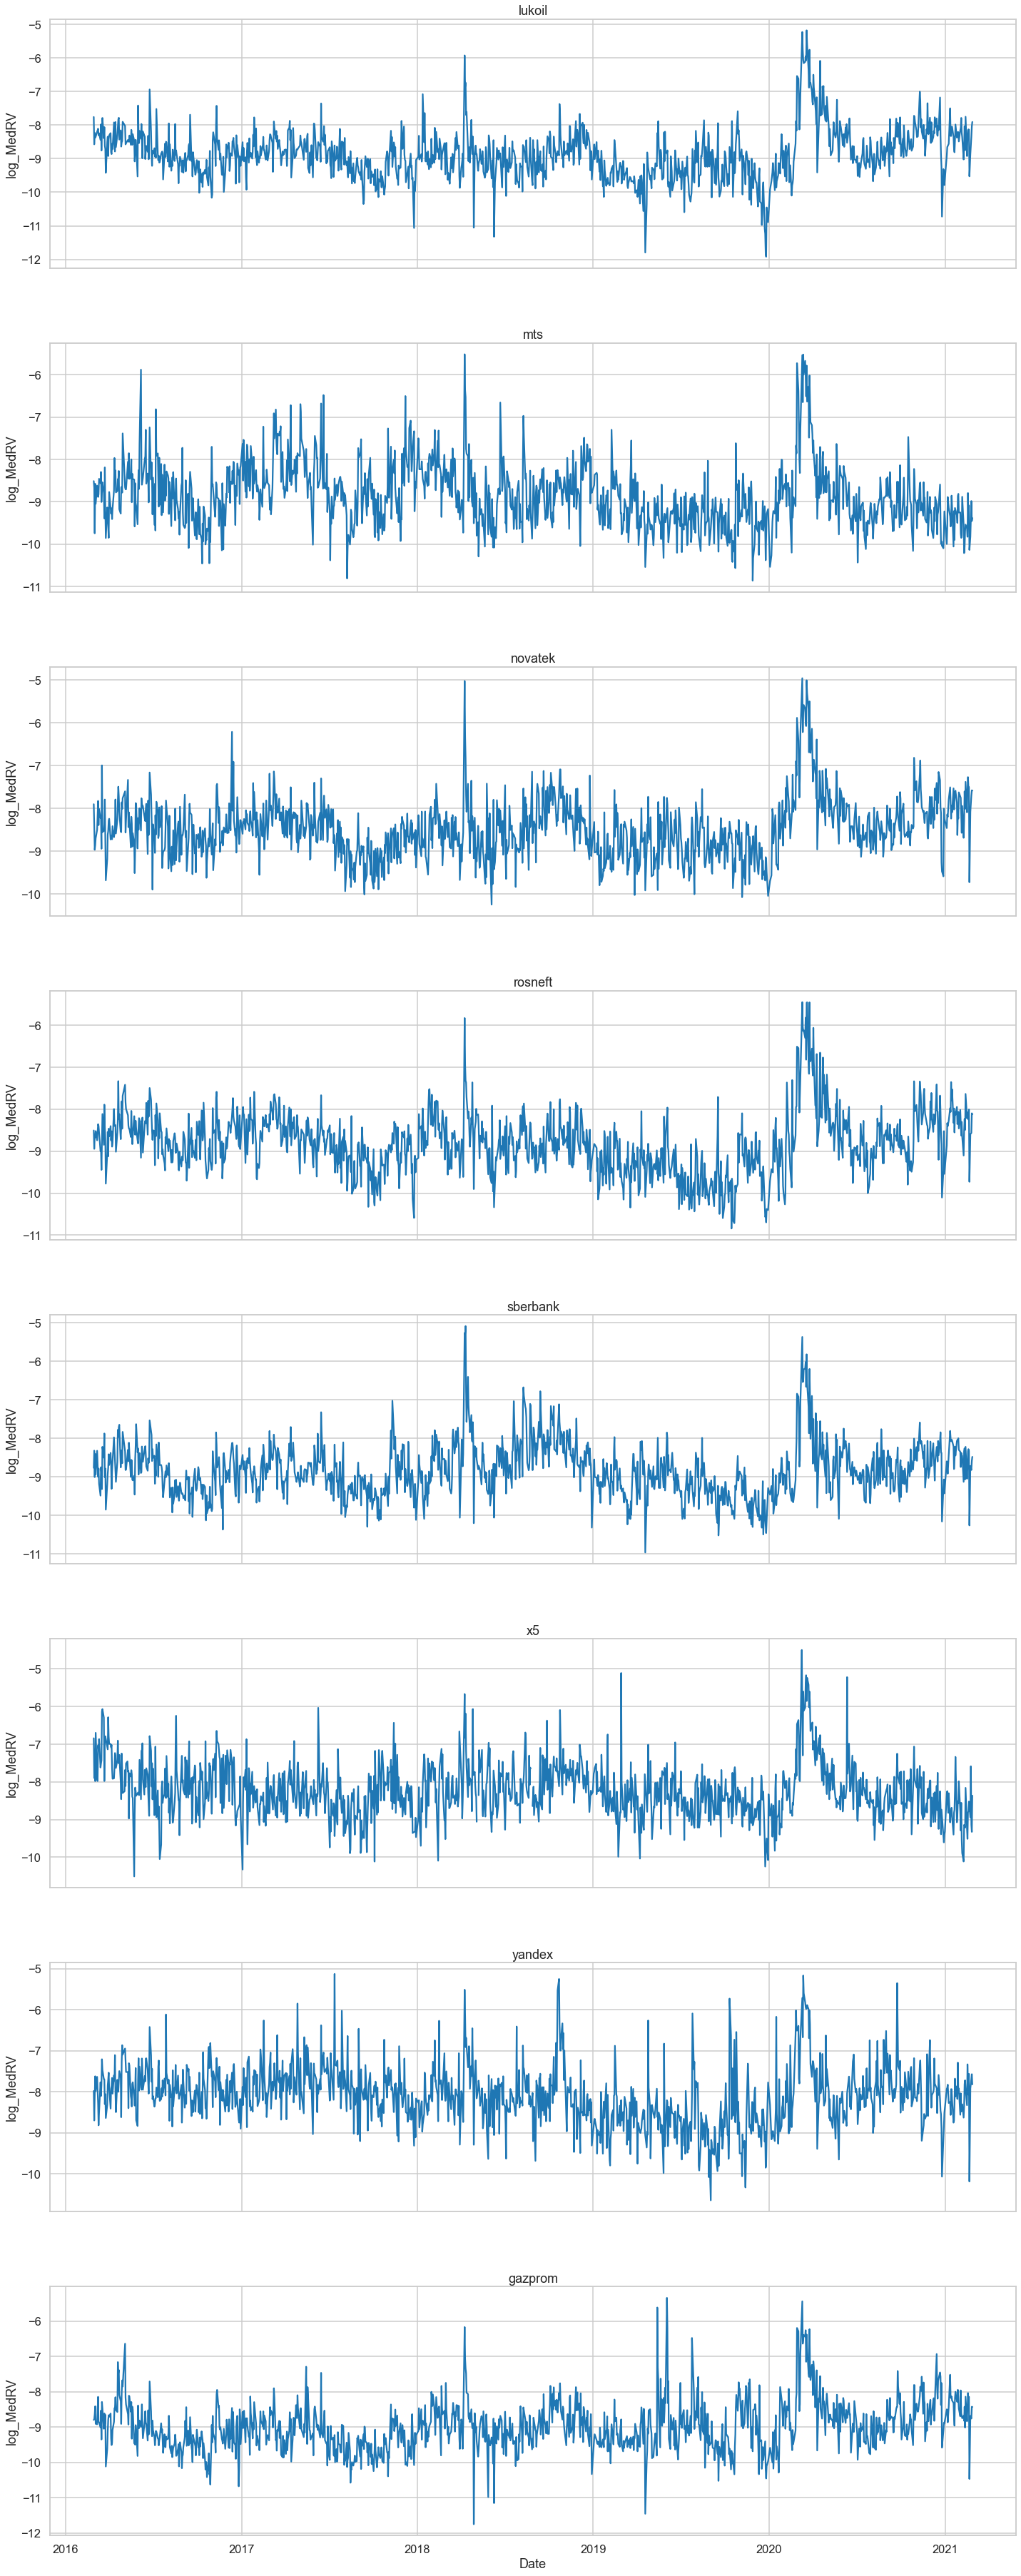

In [12]:
fig, axes = plt.subplots(8,1, figsize=(20, 50), sharex = True)
fig.tight_layout(h_pad=5)


for i, name in enumerate(companies_RV):
    sns.lineplot(x = companies_RV_dfs[name]['date'].values, y = companies_RV_dfs[name]['log_MedRV'].values, ax = axes[i])
    axes[i].set_title(f'{companies[i]}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('log_MedRV') 

### 4.2 Distribution log_MedRV 

In [13]:
companies_RV_dfs['x5_RV'] = companies_RV_dfs['x5_RV'][companies_RV_dfs['x5_RV']['log_MedRV'] != float('-inf')]

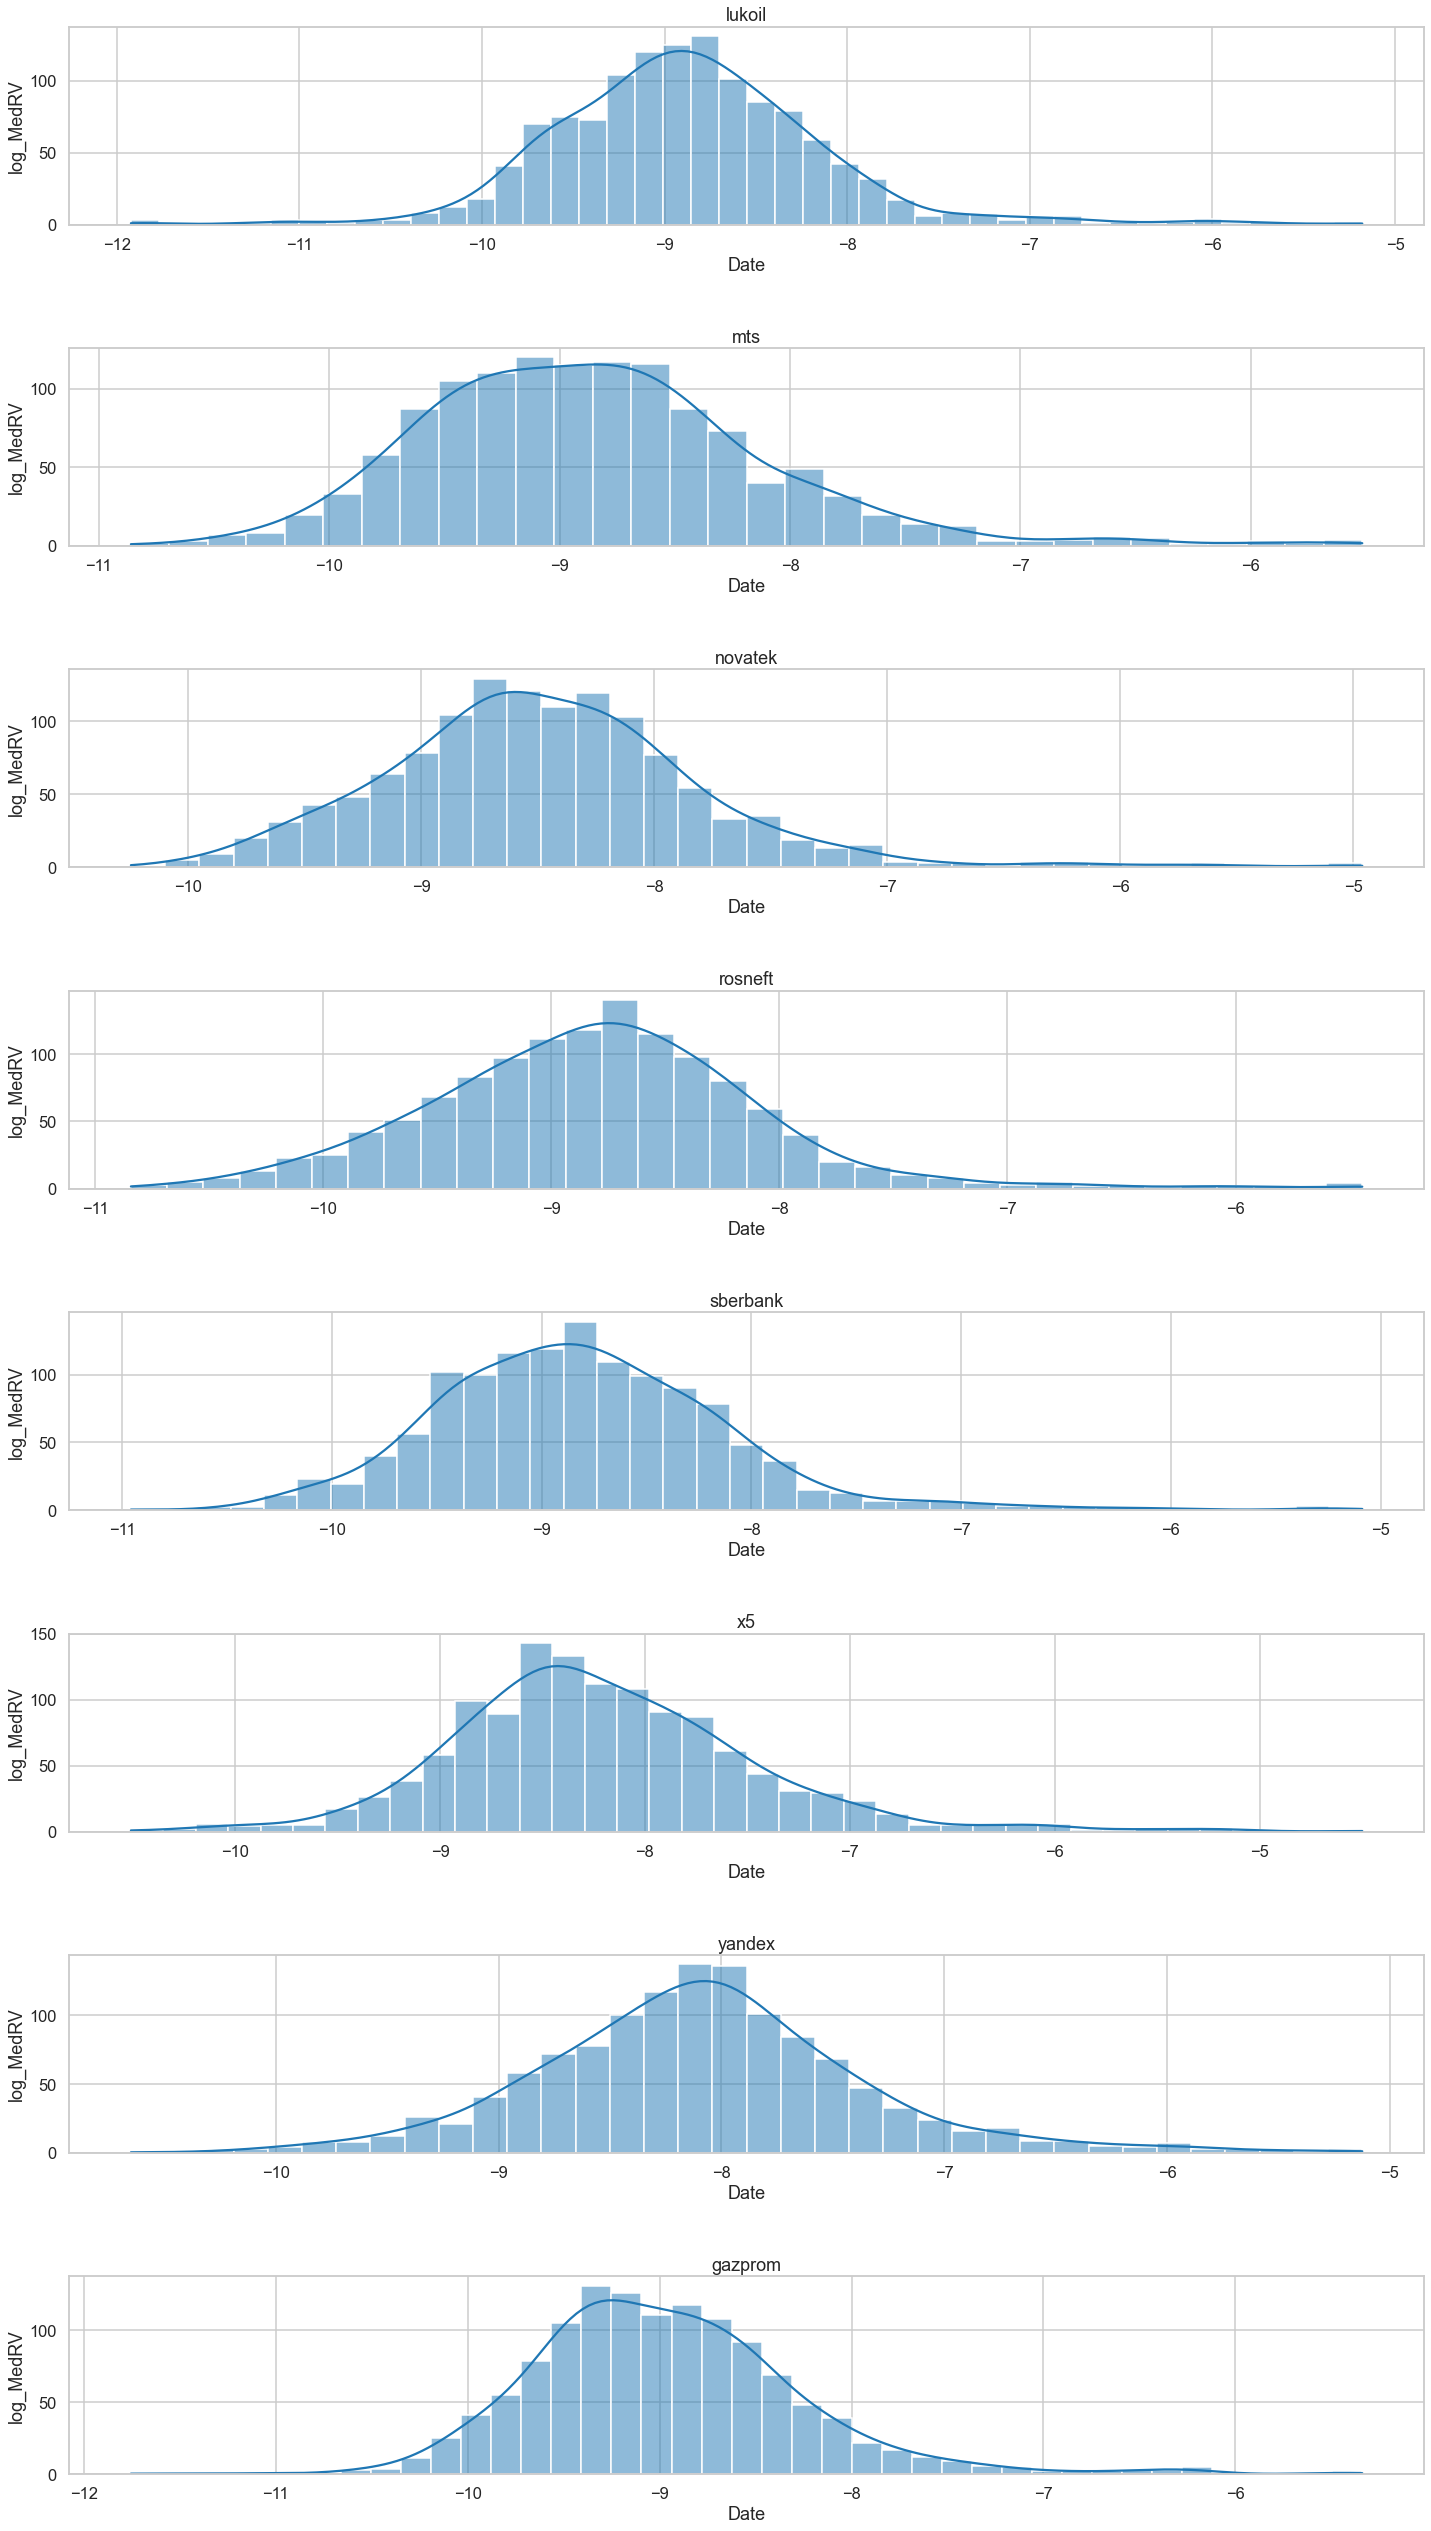

In [14]:
fig, axes = plt.subplots(8,1, figsize=(20, 35))
fig.tight_layout(h_pad=5)


for i, name in enumerate(companies_RV):
    sns.histplot(companies_RV_dfs[name]['log_MedRV'].values, kde = True,  ax = axes[i])
    axes[i].set_title(f'{companies[i]}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('log_MedRV') 

## 5. Creating RV_day, RV_week, RV_month and saving to csv

In [16]:
for name in companies_RV:
    companies_RV_dfs[name] = companies_RV_dfs[name].rename(columns ={'MedRV':'rv','log_MedRV' :'log_rv'})
    companies_RV_dfs[name]['log_rv_d'] = companies_RV_dfs[name]['log_rv'].shift()
    companies_RV_dfs[name]['log_rv_w'] = companies_RV_dfs[name]['log_rv'].shift(1).rolling(5).mean()
    companies_RV_dfs[name]['log_rv_m'] = companies_RV_dfs[name]['log_rv'].shift(1).rolling(22).mean()
    companies_RV_dfs[name].to_csv(f'data/rv/{name}.csv', sep = ';')
    